<h1>Modelo de aprendizaje autonmático: distinguiendo equipos</h1>

La tarea es crear un modelo automático que reconozca de qué equipo es la camiseta que visten los jugadores: del Barça, del Madrid, o del Athleti.

Se usa Resnet, un modelo en forma de red neuronal previamente entrenado con 1,2 millones de fotos. El objetivo es entrenar la última capa del modelo con 300 fotos (100 para cada equipo. El software mediante el que se aplica el algoritmo de Resnet es fast.ai


Descargar la última versión de fast.ai

In [1]:
## ALL GOOGLE COLAB USERS RUN THIS CELL

## This runs a script that installs fast.ai
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


Importarlo

In [2]:
## AND *EVERYBODY* SHOULD RUN THIS CELL
import warnings
warnings.filterwarnings('ignore')
from fastai.vision import *
from fastai.metrics import error_rate
import fastai
print(f'fastai: {fastai.__version__}')
print(f'cuda: {torch.cuda.is_available()}')

fastai: 1.0.59
cuda: True


Bajar el zip de Github con las imágenes de los futbolistas, descomprimirlo y marcar la ruta

In [6]:
# Run this cell to download the data we'll use for this exercise
!wget -N https://github.com/anerodata/curso-machine-learning/raw/master/2-Making-a-custom-image-detector/3_team_model/data/img.zip --quiet
!unzip -q img.zip
print('Done!')
%ls 'img/'
data_path = 'img/'

replace img/barcelona/1d7262edfb8299a7bf6c491ad666488b.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Done!
barcelona/  madrid/


In [0]:
my_transforms = None  # note: We'll talk more about transforms later
data = (ImageList.from_folder(data_path) # Where to find the data? -> in path and its subfolders
        .split_by_rand_pct()        # How to split in train/valid? -> do it *randomly* (Not by folder)
        .label_from_folder()        # How to label? -> get from the folder name
        .transform(my_transforms, size=600)  # Data augmentation? -> use tfms with a size of 600, because they all are
        .databunch(bs=16))          # Size of simultaneous batches -> 16 (higher is faster & uses more memory)

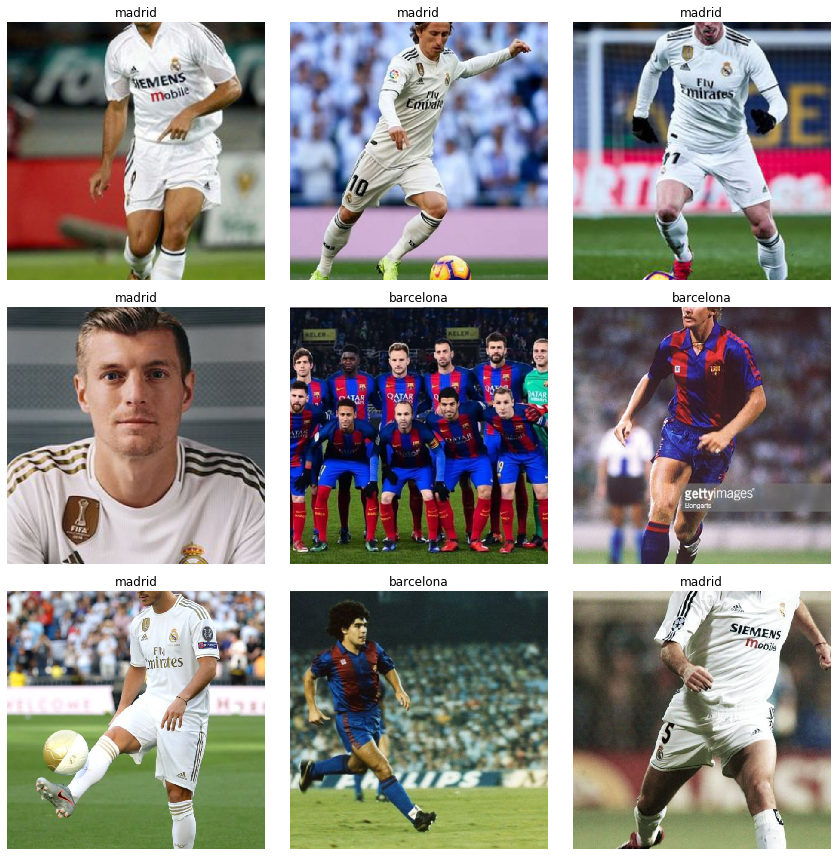

In [10]:
data.show_batch(rows=3)

In [11]:
print(data.classes)

['barcelona', 'madrid']


In [12]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 300MB/s]


In [13]:
learn.fit_one_cycle(8)

In [0]:

!wget -N 'https://raw.githubusercontent.com/anerodata/curso-machine-learning/master/2-Making-a-custom-image-detector/3_team_model/data/img_test/sanchis-test.jpg' --quiet

In [0]:
img = open_image('sanchis-test.jpg')

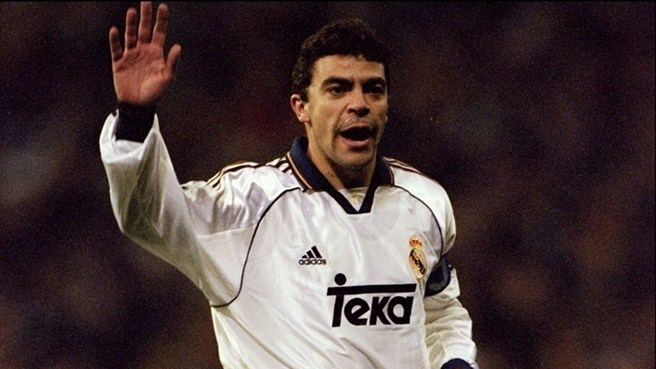

In [16]:
img

In [0]:
pred_class, pred_idx, outputs = learn.predict(img)

In [18]:
pred_class

Category madrid

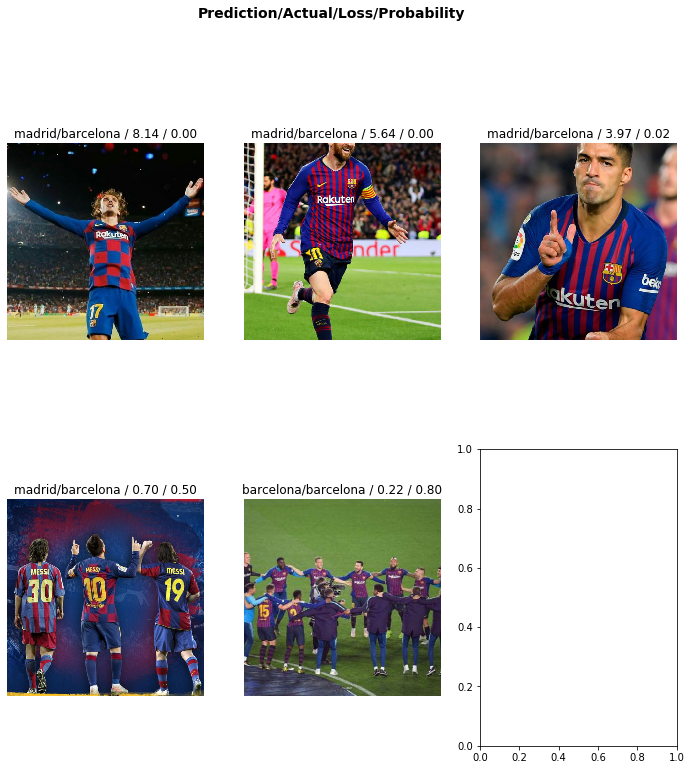

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
interp.plot_top_losses(5)

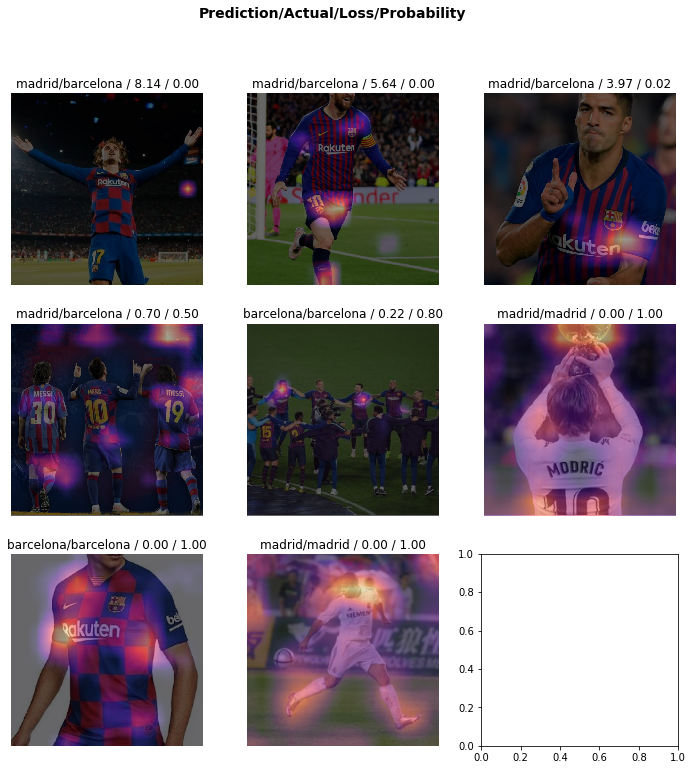

In [20]:
interp.plot_top_losses(8, heatmap = True)

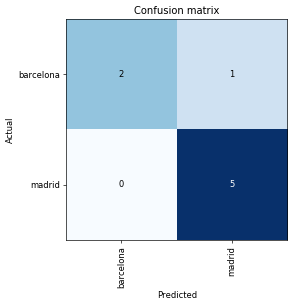

In [0]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

###Saving the model

In [23]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'ai-workshop/teams_model/'
save_path = Path(base_dir)
save_path.mkdir(parents=True, exist_ok=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
learn.export(save_path/"export.pkl")

### Using your model elsewhere (advanced)

In [0]:
defaults.device = torch.device('cpu')  # for the gpu it would be 'cuda'
# load the model from the 'export.pkl' file on your Google Drive
learn = load_learner(save_path)  

In [0]:
!wget -N 'https://raw.githubusercontent.com/anerodata/curso-machine-learning/master/2-Making-a-custom-image-detector/3_team_model/data/img_test/rivaldo-test.jpg' --quiet

In [0]:
img = open_image('rivaldo-test.jpg')

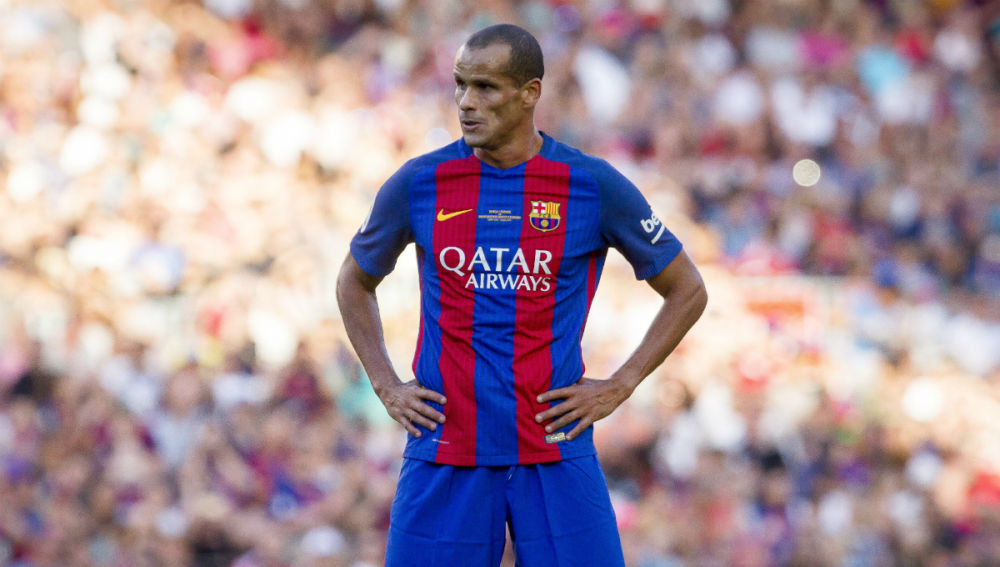

In [32]:
img

In [0]:
pred_class, pred_idx, outputs = learn.predict(img)

In [31]:
pred_class, pred_idx, outputs

(Category barcelona, tensor(0), tensor([0.9474, 0.0526]))